In [109]:
import matplotlib.pyplot as plt
import pandas as pd
from functions.bva_xml_reader import read_xml_bva
from functions.bva_xml_reader import read_xml_sync
from functions.bva_xml_reader import read_xml_phases
from functions.bva_sync_reader import read_sync_file
from functions.bva_preprocessors import clear_out_of_arena_positions
import functions.bva_plotting as bvaplt

## Chození v kruhu

In [110]:
xml_1 = "data/lp190129_20190129093604_egoalloi_visit_1.xml"
pd_bva_1 = read_xml_bva(xml_1)
bva_sync_times_1 = read_xml_sync(xml_1)
pd_sync_1 = read_sync_file("data/lp190129.csv")

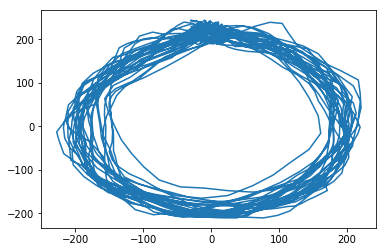

In [111]:
bvaplt.plot_walking(pd_bva_1)

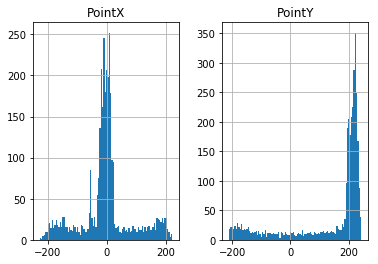

In [112]:
pd_bva_1.hist(column=['PointX', 'PointY'], bins=100)
plt.show()

## Ego allo

In [113]:
# Loading hte second data
xml_2 = "data/lp190128_20190129100818_egoalloi_visit_2.xml"
pd_bva_2 = read_xml_bva(xml_2)
bva_sync_times_2 = read_xml_sync(xml_2)
pd_sync_2 = read_sync_file("data/lp190129-2.csv")

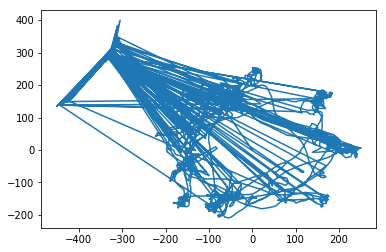

In [114]:
bvaplt.plot_walking(pd_bva_2)

These are histograms of the positions. It is clear that there is much outside of the -250 to 250 range. 

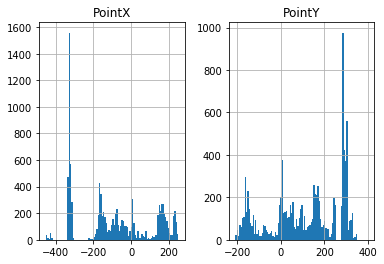

In [115]:
pd_bva_2.hist(column=['PointX', 'PointY'], bins=100)
plt.show()

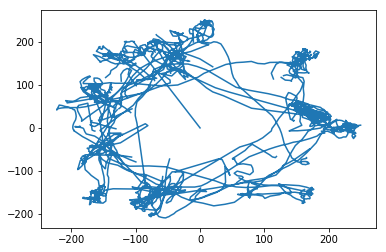

In [116]:
pd_bva_2 = clear_out_of_arena_positions(pd_bva_2)
bvaplt.plot_walking(pd_bva_2)

This is how it looks after clearing any evidently out of bounds points.

# Comparing the synchro times

## Chození v kruhu

(23,)
(24,)


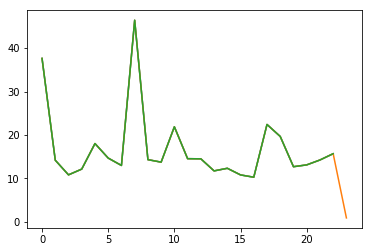

In [117]:
import numpy as np

bva_diffs = np.diff(bva_sync_times_1)
plt.plot(bva_diffs)
print(bva_diffs.shape)

csv_diffs = np.diff(pd_sync_1[pd_sync_1['action']=='1']['time'])
print(csv_diffs.shape)

plt.plot(csv_diffs)
plt.plot(bva_diffs)
plt.show()

We can see that Key right and the eeg seems to correspond well. Plotting the difference between the timelines shows us straight line

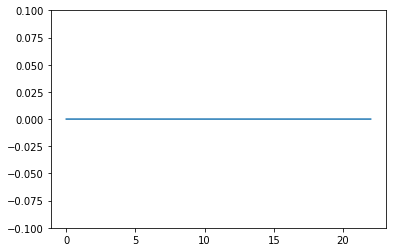

In [118]:
plt.plot(bva_diffs - csv_diffs[0:-1]) #removing hte last one
plt.ylim(-0.1,0.1)
plt.show()

## Ego Allo

(47,)
(48,)


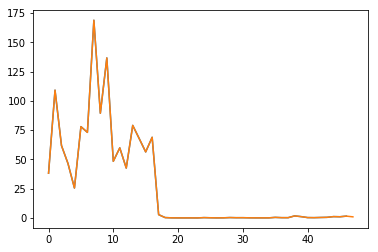

In [119]:
bva_diffs = np.diff(bva_sync_times_2)
plt.plot(bva_diffs)
print(bva_diffs.shape)

csv_diffs = np.diff(pd_sync_2[pd_sync_2['action']=='1']['time'])
print(csv_diffs.shape)

plt.plot(csv_diffs)
plt.show()

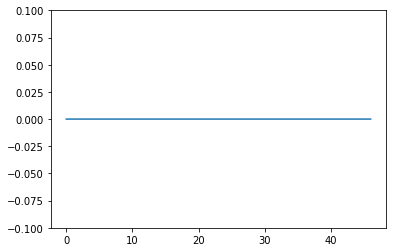

In [120]:
plt.plot(bva_diffs - csv_diffs[0:-1]) #removing hte last one
plt.ylim(-0.1,0.1)
plt.show()

We can see that Key right and the eeg seems to correspond well. Plotting the difference between the timelines shows us straight line.